In [45]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

/opt/infilect/dev/py3.5discoverenv/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [26]:
data = pd.read_csv('dataset/month-wise-market-arrivals', delimiter='\t')

data.columns = ['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax', 'priceMod']
data['date'] = data['month'] + '-' + data['year'].map(str)
data.date = pd.DatetimeIndex(data.date)
data.index = pd.PeriodIndex(data.date, freq='M')

In [27]:
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,date
date,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,2004-01-01
2005-01,BANGALORE,January,2005,335679,470,597,522,2005-01-01
2006-01,BANGALORE,January,2006,412185,286,617,537,2006-01-01
2007-01,BANGALORE,January,2007,268268,586,1167,942,2007-01-01
2008-01,BANGALORE,January,2008,393806,174,671,472,2008-01-01


In [28]:
data = data.sort_values(by = "date")
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,date
date,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,2004-01-01
2004-02,BANGALORE,February,2004,225133,741,870,793,2004-02-01
2004-03,BANGALORE,March,2004,221952,527,586,556,2004-03-01
2004-04,BANGALORE,April,2004,185150,419,518,465,2004-04-01
2004-05,BANGALORE,May,2004,137390,400,516,455,2004-05-01


In [30]:
data = data.drop(["market", "month", "year", "priceMin", "priceMax"], axis = 1)
data.head()

,quantity,priceMod,date
date,,,
2004-01,227832,991,2004-01-01
2004-02,225133,793,2004-02-01
2004-03,221952,556,2004-03-01
2004-04,185150,465,2004-04-01
2004-05,137390,455,2004-05-01


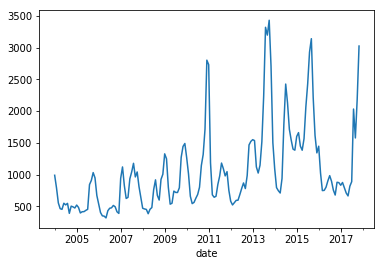

In [33]:
data.priceMod.plot()

In [35]:
data['priceModLog'] = np.log(data.priceMod)
data.head()

,quantity,priceMod,date,priceModLog
date,,,,
2004-01,227832,991,2004-01-01,6.898715
2004-02,225133,793,2004-02-01,6.675823
2004-03,221952,556,2004-03-01,6.320768
2004-04,185150,465,2004-04-01,6.142037
2004-05,137390,455,2004-05-01,6.120297


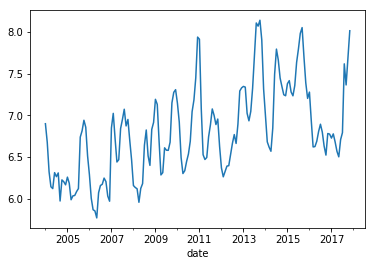

In [36]:
data.priceModLog.plot()

## Basic time series models

### Mean model

/opt/infilect/dev/py3.5discoverenv/lib/python3.5/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


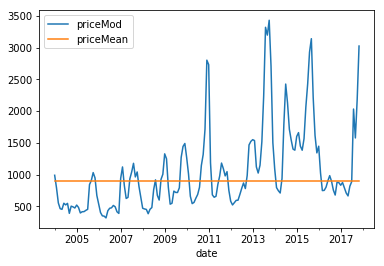

In [37]:
model_mean_pred = data.priceModLog.mean()
data["priceMean"] = np.exp(model_mean_pred)
data.plot(kind="line", x="date", y = ["priceMod", "priceMean"])

In [40]:
def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

print('model_mean_RMSE : {}'.format(RMSE(data.priceMean, data.priceMod)))

model_mean_RMSE : 674.5351987589808


### Linear Model

In [41]:
data["timeIndex"] = data.date - data.date.min()
data.head()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex
date,,,,,,
2004-01,227832,991,2004-01-01,6.898715,895.332167,0 days
2004-02,225133,793,2004-02-01,6.675823,895.332167,31 days
2004-03,221952,556,2004-03-01,6.320768,895.332167,60 days
2004-04,185150,465,2004-04-01,6.142037,895.332167,91 days
2004-05,137390,455,2004-05-01,6.120297,895.332167,121 days


In [42]:
# Convert to months using the timedelta function
data["timeIndex"] =  data["timeIndex"]/np.timedelta64(1, 'M')

# Round the number to 0
data["timeIndex"] = data["timeIndex"].round(0).astype(int)
data.head()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex
date,,,,,,
2004-01,227832,991,2004-01-01,6.898715,895.332167,0
2004-02,225133,793,2004-02-01,6.675823,895.332167,1
2004-03,221952,556,2004-03-01,6.320768,895.332167,2
2004-04,185150,465,2004-04-01,6.142037,895.332167,3
2004-05,137390,455,2004-05-01,6.120297,895.332167,4


In [47]:
# Plot linear regression between priceMod and timeIndex
model_linear = smf.ols('priceModLog ~ timeIndex', data = data).fit()
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            priceModLog   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     89.79
Date:                Sun, 05 Nov 2017   Prob (F-statistic):           2.80e-17
Time:                        11:52:35   Log-Likelihood:                -98.284
No. Observations:                 167   AIC:                             200.6
Df Residuals:                     165   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2436      0.068     92.414      0.000       6.110       6.377
timeIndex      0.0067      0.001      9.476      0.000       0.005       0.008
==============================================================================
Omnibus:                        6.910   Durbin-Watson:                   0.320
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                6.838
Skew:                           0.454   Prob(JB):                       0.0327
Kurtosis:                       2.602   Cond. No.                         191.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/opt/infilect/dev/py3.5discoverenv/lib/python3.5/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


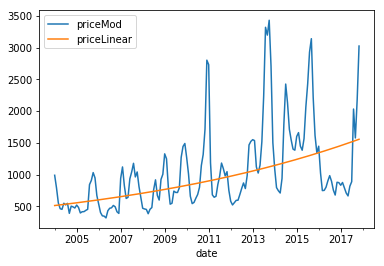

In [49]:
model_linear_pred = model_linear.predict()
data["priceLinear"] = np.exp(model_linear_pred)
data.plot(kind="line", x="date", y = ["priceMod", "priceLinear"])

In [50]:
print('model_linear_RMSE : {}'.format(RMSE(data.priceLinear, data.priceMod)))

model_linear_RMSE : 583.845151178354


### Random walk model

In [52]:
data["priceModLogShift1"] = data.priceModLog.shift()
data.head()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex,priceLinear,priceModLogShift1
date,,,,,,,,
2004-01,227832,991,2004-01-01,6.898715,895.332167,0,514.717691,NaN
2004-02,225133,793,2004-02-01,6.675823,895.332167,1,518.162122,6.898715
2004-03,221952,556,2004-03-01,6.320768,895.332167,2,521.629603,6.675823
2004-04,185150,465,2004-04-01,6.142037,895.332167,3,525.120288,6.320768
2004-05,137390,455,2004-05-01,6.120297,895.332167,4,528.634332,6.142037


/opt/infilect/dev/py3.5discoverenv/lib/python3.5/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


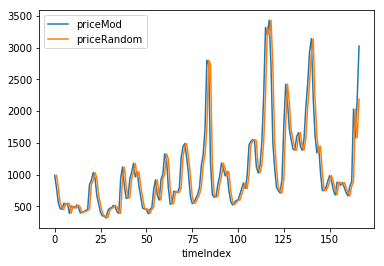

In [56]:
data["priceRandom"] = np.exp(data.priceModLogShift1)
data["priceModLogDiff"] = data.priceModLog - data.priceModLogShift1
data.plot(kind="line", x="timeIndex", y = ["priceMod","priceRandom"])

In [54]:
print('model_random_RMSE : {}'.format(RMSE(data.priceRandom, data.priceMod)))

model_random_RMSE : 329.67094766591094


## Time series decomposition

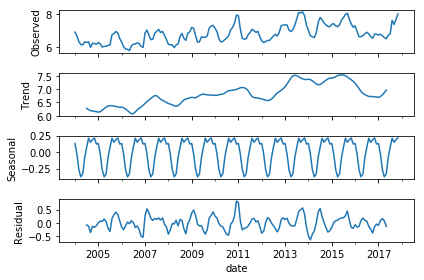

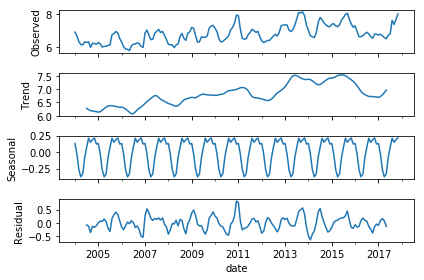

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose

data.index = data.index.to_datetime()
decomposition = seasonal_decompose(data.priceModLog, model = "additive")

decomposition.plot()

/opt/infilect/dev/py3.5discoverenv/lib/python3.5/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


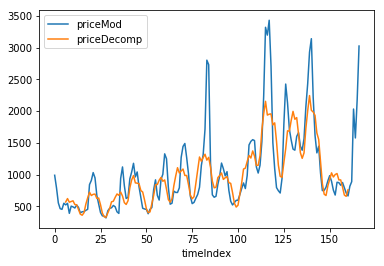

In [65]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

data["priceDecomp"] = np.exp(trend + seasonal)
data.plot(kind="line", x="timeIndex", y = ["priceMod", "priceDecomp"])

In [67]:
print('model_decomp_RMSE : {}'.format(RMSE(data.priceDecomp, data.priceMod)))

model_decomp_RMSE : 365.3364693923517


## ARIMA

In [57]:
ts = data.priceModLog
ts_diff = data.priceModLogDiff
ts_diff.dropna(inplace = True)

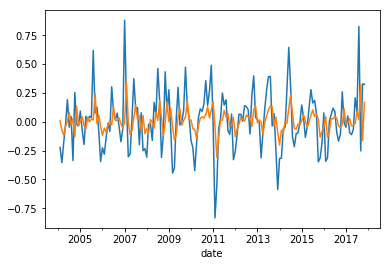

In [58]:
from statsmodels.tsa.arima_model import ARIMA

model_AR1MA = ARIMA(ts_diff, order=(1,0,1))
results_ARIMA = model_AR1MA.fit(disp = -1)

ts_diff.plot()
results_ARIMA.fittedvalues.plot()

/opt/infilect/dev/py3.5discoverenv/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/opt/infilect/dev/py3.5discoverenv/lib/python3.5/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


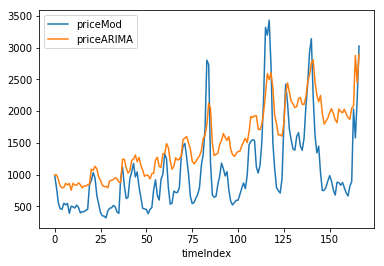

In [59]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

predictions_ARIMA_log = pd.Series(ts.ix[0], index=ts.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fprint('model_arima_RMSE : {}'.format(RMSE(data.priceARIMA, data.priceMod)))ill_value=0)

data['priceARIMA'] = np.exp(predictions_ARIMA_log)
data.plot(kind="line", x="timeIndex", y = ["priceMod", "priceARIMA"])

In [66]:
print('model_arima_RMSE : {}'.format(RMSE(data.priceARIMA, data.priceMod)))

model_arima_RMSE : 623.9787330858788


/opt/infilect/dev/py3.5discoverenv/lib/python3.5/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


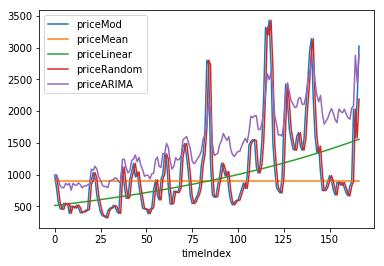

In [61]:
data.plot(kind="line", x="timeIndex", y = ["priceMod", "priceMean", "priceLinear", "priceRandom",
                                           "priceARIMA"])